<a href="https://colab.research.google.com/github/brijeshksingh/AIML_Colab_repo/blob/main/may18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith

In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/583.9 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.8 MB/s eta 0:00:00


In [3]:
from google.colab import userdata

In [5]:
groq_api_key = userdata.get('groq_api_key')
langsmith_api_key = userdata.get('langsmith_api_key')
print(groq_api_key)
print(langsmith_api_key)

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
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


In [6]:
import os
os.environ['GROQ_API_KEY'] = groq_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
#os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['lANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_PROJECT'] = 'langgraph-demo'


In [7]:
from langchain_groq import ChatGroq

In [9]:
llm = ChatGroq(groq_api_key=groq_api_key, model="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f323f11e4d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f323f1108d0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages

In [11]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)


In [12]:
graph_builder

In [13]:
def chatbot(state:State):
  return {"messages": llm.invoke(state["messages"])}

In [14]:
graph_builder.add_node("chatbot",chatbot)
graph_builder

In [15]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph_builder

In [17]:
graph = graph_builder.compile()

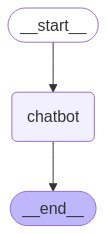

In [19]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [20]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages': ('user', user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant: ', value['messages'].content)

User: hello


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


dict_values([{'messages': AIMessage(content='Hello! How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 11, 'total_tokens': 24, 'completion_time': 0.023636364, 'prompt_time': 0.002104455, 'queue_time': 0.066855336, 'total_time': 0.025740819}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--0a8a9d65-e51f-470a-a116-3ce40489bfd0-0', usage_metadata={'input_tokens': 11, 'output_tokens': 13, 'total_tokens': 24})}])
content='Hello! How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 11, 'total_tokens': 24, 'completion_time': 0.023636364, 'prompt_time': 0.002104455, 'queue_time': 0.066855336, 'total_time': 0.025740819}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--0a8a9d65-e51f-470a-a116-3ce40

User: what is agentic ai


dict_values([{'messages': AIMessage(content="Agentic AI refers to a type of artificial intelligence that possesses the ability to act autonomously and make decisions in a goal-oriented manner. \n\nHere's a breakdown of the key characteristics:\n\n**Key Characteristics:**\n\n* **Autonomy:** Agentic AI systems can operate independently without direct human intervention. They have the capacity to perceive their environment, make decisions, and take actions to achieve their objectives.\n* **Goal-Oriented:** These AI agents are driven by goals and strive to achieve them. Their actions are designed to maximize the likelihood of reaching their desired outcomes.\n* **Learning and Adaptation:** Many agentic AI systems incorporate learning mechanisms, enabling them to improve their performance over time based on experience and feedback.\n\n**Examples:**\n\n* **Robotics:** Autonomous robots that navigate complex environments, perform tasks, and interact with their surroundings.\n* **Game AI:** No

User: what is langchain?


dict_values([{'messages': AIMessage(content="LangChain is an open-source framework designed to simplify the development of applications powered by large language models (LLMs). \n\nThink of it as a toolbox filled with components specifically designed to work seamlessly with LLMs like me. \n\n**Here's a breakdown of what LangChain offers:**\n\n* **Modular Components:** \n    *  **Models:** It provides easy integration with various LLMs, not just OpenAI's models. You can connect with models from HuggingFace, Cohere, and more.\n    *  **Prompts:**  Helps you craft effective prompts for your LLMs, leading to better responses.\n    *  **Memory:** Allows your applications to remember past interactions with users, creating a more conversational and personalized experience.\n    *  **Chains:**  Lets you string together multiple components (models, prompts, memories) to build complex workflows.\n\n* **Abstraction:** \n\nLangChain hides the complexities of interacting with LLMs, letting you focu

User: q
Good Bye
